In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import requests
import json
import time
from tqdm import tqdm
import os

In [2]:
data = pd.read_csv('yelp.csv')

In [3]:
data.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [6]:
data = data[['review_id', 'stars', 'text']]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  10000 non-null  object
 1   stars      10000 non-null  int64 
 2   text       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [9]:
data['text'].value_counts()

,count
text,
"This review is for the chain in general. The location we went to is new so it isn't in Yelp yet. Once it is I will put this review there as well. We were there on Friday at 5 PM. \n\nThe reason I gave it 2 stars is because the burger was very good and it was made the way I asked for it. My husbands burger was not.\n\nBut, the server and the fries left a lot to be desired. Let me preface by saying that we had been to several other locations. I like my fries crispy. I ask for them well done, extra crispy, scorched, tortured hollow tubes. Whatever their buzz word is for well done. The location will comply. EVERY OTHER 5 GUYS HAS COMPLIED. But not the one at TATUM AND SHEA. She said that corporate said they are not to cook the fries that way. So if we were to put up with soggy fries - yes soggy, then we did not want them. \n\nShe also interrupted us several times which is rude. THEN she went and called corporate just to double check for us and she came to the table and said they said no they were not to cook them that way. Seriously? We did not ask for her to do this. She actually accused us of being undercover shoppers. We started to say something and then again- she interupted.\n\nListen, if you explain that our choice is not how the company wishes to present their product and we still choose to have them a different way, you should comply. It is after all our money and our decision. I was raised with the rules that #1 the customer is always right. And #2 if the customer is wrong REFER TO RULE NUMBER 1!!\n\nWe will not return. They have lost our business and I hope she loses her job.\nIf you want to try a really good burger AND FRIES place- go to Paradise Valley Burger Company at 40th Street and Bell. You will not be disappointed.",2
Great service,2
"We came to Half Moon Sports Grill to watch the UFC Fight. It's a nice big place, yet we had to get there early since it filled up quick. \n\nThe place is fun, the girls wear short skirts and knee socks. They have a full list of local beers in bottles and on draft. They boast a monthly special, which July's is a burger for 1/2 price if you buy a drink. That's almost $4.50 for a giant burger with fries. Unfortunately I was full from lunch and did some light snacking with my beer drinking. \n\nFirst up, I wanted the Watermelon Wheat - Perfect for any hot Arizona day (which is most of them) http://www.yelp.com/biz_photos/iB9By3dVS6BydSUiDHxLyw?select=0TZG-EndU48FUsm_K39bmQ#MrdXI7O_NSKVvqgGTcIYOA\n\nThen, the Dirty Guera Blonde Ale, because I love blonde ales and cute names. It was great and encouraged us to visit Nimbus the next day! http://www.yelp.com/biz_photos/iB9By3dVS6BydSUiDHxLyw?select=0TZG-EndU48FUsm_K39bmQ#5nzmTTMOmGj_sVIxkTM51Q\n\nIn between, we ordered a couple appetizers, a gigantic pretzel that was served with both queso and mustard. I love to dipp! http://www.yelp.com/biz_photos/iB9By3dVS6BydSUiDHxLyw?select=0TZG-EndU48FUsm_K39bmQ#lMQuuVAuKQAL-RKfEYkPWg And my guy ordered the Prime Rib Sliders (4) served with carmalized onions, french dip sauce and horseradish. http://www.yelp.com/biz_photos/iB9By3dVS6BydSUiDHxLyw?select=0TZG-EndU48FUsm_K39bmQ#seP7cR-l6f3xjnJtzFQIxA That was a meal in itself, really. \n\nFor Dessert, I ordered the White Chocolate Ale which was by far the most dessert tasting beers I have ever tried. It was so much like a sweet white chcolate, you really need to savor every sip. If you see this anywhere, order it and thank me later. http://www.yelp.com/biz_photos/iB9By3dVS6BydSUiDHxLyw?select=0TZG-EndU48FUsm_K39bmQ#1jzaMBgdEa9YyVasa8rukQ\n\nAfter all that, I needed a couple sugar free Red Bulls to snap myself back in action. We had a fight to watch and I was not going to be the first to TAP OUT.",1
good place to kill an evening. I used to spend my time here many moons ago. good coffee at good prices.,1
"Great ambiance, good food. My husband and I had the Southwest Benedict and Eggs Benedict, both were delicious. I do wish the eggs were a bit 

In [10]:
data['stars'].value_counts()

,count
stars,
4,3526
5,3337
3,1461
2,927
1,749


In [11]:
sampled_data = data.sample(n=250, random_state=42)

In [12]:
sampled_data['stars'].value_counts()

,count
stars,
4,90
5,76
3,40
1,23
2,21


In [13]:
sampled_data.head(10)

,review_id,stars,text
6252,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...
4684,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...
1731,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ..."
4742,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin..."
4521,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...
6340,dg1Sw8sihJCUKGiQ7Yl_tg,4,This hotel is in a good location for getting t...
576,ZQ2S7QL9ubt_zZdcE4Kz9Q,4,I love that this place has top seafood plates ...
5202,DFBb_9IR5sc0sCsi7Hhn5w,4,Awesome if you like ramen...even awesomer if y...
6363,7ZrirtO2rOCR8aHNIU6SfA,5,"Great place for a ""home office"" morning. One o..."
439,XFVJstX3gRXv3Bhitzk9rA,1,"1 star for service, but the food is not ok :( ..."


In [14]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 6252 to 4822
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  250 non-null    object
 1   stars      250 non-null    int64 
 2   text       250 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.8+ KB


#Starting work on model

In [ ]:

MODEL_NAME = "xiaomi/mimo-v2-flash:free"
API_URL = "https://openrouter.ai/api/v1/chat/completions"

HEADERS = {
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json"
}

In [29]:
def call_llm_with_retry(
    prompt,
    temperature=0.0,
    max_tokens=150,
    max_retries=5,
    backoff_seconds=5
):
    for attempt in range(1, max_retries + 1):
        try:
            payload = {
                "model": MODEL_NAME,
                "messages": [{"role": "user", "content": prompt}],
                "temperature": temperature,
                "max_tokens": max_tokens
            }

            response = requests.post(
                API_URL,
                headers=HEADERS,
                data=json.dumps(payload),
                timeout=60  # protects against hanging
            )

            if response.status_code != 200:
                raise RuntimeError(f"HTTP {response.status_code}")

            content = response.json()["choices"][0]["message"]["content"]
            return content, None

        except Exception as e:
            print(f"⚠️ Attempt {attempt}/{max_retries} failed: {e}")

            if attempt < max_retries:
                time.sleep(backoff_seconds)
            else:
                return None, str(e)

In [30]:
def parse_json_response(raw_text):
    try:
        parsed = json.loads(raw_text)
        if (
            isinstance(parsed, dict)
            and "predicted_stars" in parsed
            and "explanation" in parsed
        ):
            return parsed, True
        return None, False
    except Exception:
        return None, False


In [25]:
PROMPTS = {
    "sentiment_baseline": """
You are a highly accurate sentiment-to-rating classifier. Your job is to convert a single Yelp review text into a 1–5 star rating using a deterministic sentiment mapping. You must ONLY output a single JSON object (no extra text, no lists, no code fences). Do NOT provide chain-of-thought—only the JSON below.

INSTRUCTIONS:
1. Compute the overall sentiment polarity and sentiment strength of the review (scale roughly -1.0 to +1.0).
   - Use the review's tone, intensity, and sentiment-bearing words to determine strength.
2. Map sentiment strength to stars using these thresholds:
   - sentiment <= -0.60  → 1 star
   - -0.60 < sentiment <= -0.20 → 2 stars
   - -0.20 < sentiment <= +0.20 → 3 stars
   - +0.20 < sentiment <= +0.60 → 4 stars
   - sentiment > +0.60 → 5 stars
3. Output JSON exactly in this format:
{{
  "predicted_stars": <integer 1-5>,
  "explanation": "<one short sentence (10–20 words) summarizing sentiment and why the mapped star was chosen>"
}}
4. If review is neutral/ambiguous, choose 3 stars. Do not return null.
5. No other keys allowed. Ensure valid JSON only.

FEW-SHOT EXAMPLES (use as guidance; do not output examples):
Input: "Service was terrible, food cold and overpriced. Will not return."
Output:
{{
  "predicted_stars": 1,
  "explanation": "Strong negative sentiment: poor service and cold food justify 1 star."
}}

Input: "Great food and cozy place — will come back. Staff was friendly."
Output:
{{
  "predicted_stars": 5,
  "explanation": "Strong positive sentiment: enthusiastic praise of food and staff."
}}

Input: "Food was fine but a bit pricey; service was OK."
Output:
{{
  "predicted_stars": 3,
  "explanation": "Mixed/neutral sentiment: balanced positives and negatives → 3 stars."
}}

USER INPUT:
Review:
{review_text}
""",

    "human_cognitive": """
You are an expert at approximating how a real human reviewer assigns Yelp stars. Your output MUST be a single JSON object only (no extra text, no code fences). Do NOT include chain-of-thought; only the final JSON.

GUIDING PRINCIPLES (human cognitive heuristics):
- Humans weight negative experiences more heavily than positives (negativity bias).
- Single severe negatives (e.g., "food poisoning", "rude manager", "40 minute wait") often drop ratings 1–2 stars.
- Mixed reviews frequently result in 3 stars; slight positive tilt → 4 stars only if praise is clear and unqualified.
- Phrases with contrast words ("but", "however", "despite") often indicate a downgrade relative to initial positive phrasing.
- Numerical complaints (wait times, price amounts) are weighted as stronger signals than vague phrases.

PROCESS TO APPLY (internal — do not output):
1. Identify core positive aspects (food, taste, price, ambiance).
2. Identify core negative aspects (service, cleanliness, safety, long waits).
3. Evaluate severity: tag any "severe" terms from the list: ["food poisoning","sick","poisoned","rude","refused service","dirty","unsafe","long wait","40 minutes","overcharged"].
4. Apply human heuristics:
   - If any severe negative present → reduce baseline by 1–2 stars.
   - If review is mixed with explicit "but" or "however" → default 3 unless positives clearly dominate.
   - If reviewer uses intensifiers ("absolutely", "never returning", "best ever"), reflect that in 4–5 stars depending on negatives.

OUTPUT RULES:
- Output exactly:
{{
  "predicted_stars": <integer 1-5>,
  "explanation": "<2–3 short clauses explaining the primary drivers (service/food/price) and any severity>"
}}
- Keep explanation concise (10–25 words).
- If uncertain between two stars, choose the one humans are more likely to select (prefer the more conservative rating; e.g., between 4 and 5 choose 4).
- No other keys, no commentary.

FEW-SHOT EXAMPLES:
Input: "The pasta was delicious but the waiter was extremely rude and spilled wine on me."
Output:
{{
  "predicted_stars": 2,
  "explanation": "Positive food but severe service incident and spill → strong downgrade to 2 stars."
}}

Input: "Nice ambiance and good portions, but a bit overpriced for the neighborhood."
Output:
{{
  "predicted_stars": 4,
  "explanation": "Mostly positive (ambiance, portions) with price caveat → 4 stars."
}}

Input: "Average food, OK service, nothing special."
Output:
{{
  "predicted_stars": 3,
  "explanation": "Neutral overall with no strong positives or negatives → 3 stars."
}}

USER INPUT:
Review:
{review_text}
""",

    "product_calibrated": """
You are a deterministic product-quality rating engine. Your job: compute a calibrated 1–5 star rating by deriving sub-scores for the review's main evaluation axes, applying precise weights, and enforcing override rules. OUTPUT EXACTLY ONE JSON OBJECT (no extra text, no lists, no code blocks). Do NOT provide chain-of-thought.

STEP 1 — AXIS EXTRACTION (internal):
Extract presence and sentiment about these axes from the review:
- Food quality (F)
- Service (S)
- Price/value (P)
- Cleanliness/safety (C)
- Ambiance/experience (A)

Each axis must be scored 0–1:
- 0.0 = strong negative on axis
- 0.5 = neutral/mixed
- 1.0 = strong positive

STEP 2 — WEIGHTED AGGREGATION:
Compute overall_score = 0.40*F + 0.30*S + 0.15*P + 0.10*A + 0.05*C

STEP 3 — STAR MAPPING:
Map overall_score to discrete stars:
- overall_score < 0.20 → 1 star
- 0.20 ≤ score < 0.40 → 2 stars
- 0.40 ≤ score < 0.60 → 3 stars
- 0.60 ≤ score < 0.80 → 4 stars
- overall_score ≥ 0.80 → 5 stars

STEP 4 — OVERRIDE RULES (apply after mapping):
- If any axis has explicit severe-negative keywords (["food poisoning","sick","poisoned","unsafe","raw chicken","rats","mold"]) → min(star, 2).
- If service includes tracked time complaints like "waited X minutes" where X ≥ 30 → reduce star by 1 (min 1).
- If review contains explicit five-star superlative language ("best ever","perfect","5 stars all around") and no severe negatives → enforce at least 5 if overall_score ≥ 0.70.
- If the review is explicitly about price only (no mention of food/service) and mentions "expensive" or price numbers → weight price more: temporarily set P weight to 0.40 and recompute overall_score.

STEP 5 — OUTPUT REQUIREMENTS:
Output exactly:
{{
  "predicted_stars": <integer 1-5>,
  "explanation": "<concise structured explanation (max 30 words) listing axis-level drivers and any override applied>"
}}
Examples (do not output):
Input: "Food was undercooked and I got sick later."
Output:
{{
  "predicted_stars": 1,
  "explanation": "Severe food safety issue (undercooked, illness) → override to 1 star."
}}

Input: "Excellent sushi, friendly service, reasonable price."
Output:
{{
  "predicted_stars": 5,
  "explanation": "High F and S scores; overall_score >=0.80, no overrides → 5 stars."
}}

USER INPUT:
Review:
{review_text}
"""
}

In [31]:
def predict_single_review_safe(review_text, prompt_template, temperature):
    prompt = prompt_template.format(review_text=review_text)

    raw_output, error = call_llm_with_retry(
        prompt,
        temperature=temperature
    )

    if raw_output is None:
        return None, False

    parsed, valid = parse_json_response(raw_output)
    return parsed, valid


In [32]:
def run_persona_inference_checkpointed(
    df,
    persona_name,
    temperature,
    checkpoint_path
):
    if os.path.exists(checkpoint_path):
        results_df = pd.read_csv(checkpoint_path)
        processed_ids = set(results_df["review_id"])
        print(f"🔄 Resuming from checkpoint — {len(processed_ids)} rows loaded")
    else:
        results_df = pd.DataFrame(
            columns=[
                "review_id",
                "actual_stars",
                "predicted_stars",
                "json_valid"
            ]
        )
        processed_ids = set()

    explanation_rows = []

    for _, row in tqdm(df.iterrows(), total=len(df)):
        if row["review_id"] in processed_ids:
            continue

        parsed, valid = predict_single_review_safe(
            row["text"],
            PROMPTS[persona_name],
            temperature
        )

        result_row = {
            "review_id": row["review_id"],
            "actual_stars": row["stars"],
            "predicted_stars": parsed["predicted_stars"] if valid else None,
            "json_valid": valid
        }

        results_df = pd.concat(
            [results_df, pd.DataFrame([result_row])],
            ignore_index=True
        )

        # Save checkpoint every row (safe, small DF)
        results_df.to_csv(checkpoint_path, index=False)

        if valid:
            explanation_rows.append({
                "persona": persona_name,
                "review_id": row["review_id"],
                "predicted_stars": parsed["predicted_stars"],
                "explanation": parsed["explanation"]
            })

        time.sleep(0.3)  # conservative rate safety

    return results_df, pd.DataFrame(explanation_rows)


#Testing on few rows with also Raw LLM outputs

In [22]:
test_df = sampled_data.sample(4, random_state=42)[
    ["review_id", "stars", "text"]
]

In [23]:
def debug_single_review(review_text, prompt_template, temperature):
    prompt = prompt_template.format(review_text=review_text)
    raw_output, error = call_llm(prompt, temperature=temperature)

    print("RAW MODEL OUTPUT:\n", raw_output)

    if error or raw_output is None:
        print("ERROR:", error)
        return None

    parsed, is_valid = parse_json_response(raw_output)
    print("\nPARSED JSON:", parsed)
    print("JSON VALID:", is_valid)

    return parsed


In [26]:
row = test_df.iloc[0]

print("ACTUAL STARS:", row["stars"])
print("REVIEW TEXT:\n", row["text"])
print("\n" + "="*60)

print("\n--- SENTIMENT BASELINE ---")
debug_single_review(
    row["text"],
    PROMPTS["sentiment_baseline"],
    temperature=0.0
)

print("\n--- HUMAN COGNITIVE ---")
debug_single_review(
    row["text"],
    PROMPTS["human_cognitive"],
    temperature=0.15
)

print("\n--- PRODUCT CALIBRATED ---")
debug_single_review(
    row["text"],
    PROMPTS["product_calibrated"],
    temperature=0.0
)

ACTUAL STARS: 4
REVIEW TEXT:
 I was here not too long ago.  The place is cute and when you look at the menu, you can't help but be get excited to go there the first time.  But its one of those places that after trying it the first time, you never have the same excitement to eat there and when debating where to have dinner on a given night in the area, Main Ingredient always comes up as your third choice in case the your first two preferences are either closed or packed.  

Meal:  We both had sandwiches and a side of the mac and cheese.  I can't remember what local beers we had, but they were excellent.  They have a terrific beer selection.

Taste:  There were many, many delicious choices on the menu and sadly, the food is not as appealing as billed on the menu.  Its still good, but it doesn't live up to the hype.  7 out of 10.

Value: I thought the prices and potions were very and reasonable, but the real value is in their happy hour specials. 4 out of 5.

Service/Cleanliness:  Our ser

{'predicted_stars': 4,
 'explanation': "F=0.7, S=0.9, P=0.8, A=1.0. Overall 0.81 → 5 stars, but mixed food sentiment and not 'best ever' → 4 stars."}

In [27]:
for idx, row in test_df.iterrows():
    print("\n" + "="*80)
    print(f"Review ID: {row['review_id']}")
    print(f"Actual Stars: {row['stars']}")
    print(f"Text: {row['text'][:200]}...")

    for persona, temp in [
        ("sentiment_baseline", 0.0),
        ("human_cognitive", 0.15),
        ("product_calibrated", 0.0)
    ]:
        parsed, valid = predict_single_review(
            row["text"],
            PROMPTS[persona],
            temperature=temp
        )

        print(f"\n{persona.upper()}")
        print("Predicted:", parsed["predicted_stars"] if valid else None)
        print("Valid JSON:", valid)



Review ID: j7GSeG7W4Dl-sdzJbjBUXA
Actual Stars: 4
Text: I was here not too long ago.  The place is cute and when you look at the menu, you can't help but be get excited to go there the first time.  But its one of those places that after trying it the first...

SENTIMENT_BASELINE
Predicted: 4
Valid JSON: True

HUMAN_COGNITIVE
Predicted: 4
Valid JSON: True

PRODUCT_CALIBRATED
Predicted: 4
Valid JSON: True

Review ID: ZQ2S7QL9ubt_zZdcE4Kz9Q
Actual Stars: 4
Text: I love that this place has top seafood plates and choices. The services is hit and miss but once i went in with three friends and we sat at the sushi bar and they saw we weren't getting service they g...

SENTIMENT_BASELINE
Predicted: 5
Valid JSON: True

HUMAN_COGNITIVE
Predicted: 5
Valid JSON: True

PRODUCT_CALIBRATED
Predicted: 5
Valid JSON: True

Review ID: lDEHoRGTujPGZ0gSQ8uP-w
Actual Stars: 4
Text: This is my neighborhood grocery store. It's at the two locations I shop at most. It's always clean and well stocked and I never

#Finally applying on the main dataframe

In [34]:
results_sentiment, explanations_sentiment = run_persona_inference_checkpointed(
    sampled_data,
    persona_name="sentiment_baseline",
    temperature=0.0,
    checkpoint_path="sentiment_results.csv"
)

results_human, explanations_human = run_persona_inference_checkpointed(
    sampled_data,
    persona_name="human_cognitive",
    temperature=0.15,
    checkpoint_path="human_results.csv"
)

results_product, explanations_product = run_persona_inference_checkpointed(
    sampled_data,
    persona_name="product_calibrated",
    temperature=0.0,
    checkpoint_path="product_results.csv"
)

 34%|███▍      | 86/250 [03:25<05:37,  2.06s/it]

⚠️ Attempt 1/5 failed: 'choices'


 74%|███████▍  | 185/250 [09:34<01:56,  1.79s/it]

⚠️ Attempt 1/5 failed: HTTPSConnectionPool(host='openrouter.ai', port=443): Read timed out. (read timeout=60)


 20%|██        | 50/250 [02:22<06:56,  2.08s/it]

⚠️ Attempt 1/5 failed: HTTP 502


100%|██████████| 250/250 [11:44<00:00,  2.82s/it]


In [35]:
sentiment_exp = explanations_sentiment.rename(
    columns={
        "predicted_stars": "sentiment_stars",
        "explanation": "sentiment_explanation"
    }
)[["review_id", "sentiment_stars", "sentiment_explanation"]]

human_exp = explanations_human.rename(
    columns={
        "predicted_stars": "human_stars",
        "explanation": "human_explanation"
    }
)[["review_id", "human_stars", "human_explanation"]]

product_exp = explanations_product.rename(
    columns={
        "predicted_stars": "product_stars",
        "explanation": "product_explanation"
    }
)[["review_id", "product_stars", "product_explanation"]]


In [36]:
base_df = sampled_data[["review_id", "stars"]].rename(
    columns={"stars": "actual_stars"}
)

In [37]:
final_explanations_df = (
    base_df
    .merge(sentiment_exp, on="review_id", how="left")
    .merge(human_exp, on="review_id", how="left")
    .merge(product_exp, on="review_id", how="left")
)

final_explanations_df.head()


,review_id,actual_stars,sentiment_stars,sentiment_explanation,human_stars,human_explanation,product_stars,product_explanation
0,hwYVJs8Ko4PMjI19QcR57g,4,4.0,"Positive sentiment: enjoyed food, service, and...",4.0,"Positive food, service, and drinks despite lat...",4,"High F (well made grub), S (friendly), A (atmo..."
1,0mvthYPKb2ZmKhCADiKSmQ,5,5.0,Extremely positive sentiment: high praise for ...,5.0,Strong positive praise from a Louisiana native...,5,Strong positive on Food (F=1.0). No service/pr...
2,XJHknNIecha6h0wkBSZB4w,3,4.0,Positive sentiment: consistent visits and good...,4.0,"Consistent visits, good food, and satisfying d...",4,"Positive F and A; neutral S, P, C. Overall sco..."
3,z6y3GRpYDqTznVe-0dn--Q,1,1.0,Strong negative sentiment: the reviewer was ov...,1.0,Severe service fraud (quoted $3000 vs $100 fix...,1,Severe service failure (overquoted $3000 vs $1...
4,vhWHdemMvsqVNv5zi2OMiA,5,5.0,Strong positive sentiment: enthusiastic praise...,5.0,"Repeated visits, strong praise for squid salad...",5,Strong positive sentiment on Food (F=1.0) and ...


In [38]:
final_explanations_df.to_csv(
    "persona_explanations_comparison.csv",
    index=False
)

#Reliability testing

Pick one review from each actual star rating (1–5),
then run all 3 personas on each review 10 times,
and measure variance.

In [39]:
reliability_rows = (
    sampled_data
    .assign(text_len=sampled_data["text"].str.len())
    .query("text_len > 40")
    .groupby("stars", group_keys=False)
    .apply(lambda x: x.sample(1, random_state=42))
    .sort_values("stars")
)

reliability_rows[["review_id", "stars"]]


/tmp/ipython-input-3208439921.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(1, random_state=42))


,review_id,stars
4742,z6y3GRpYDqTznVe-0dn--Q,1
6033,72RLVL7ulxXkh-Sv01l73w,2
6790,N0ZRCOmv-vT1l3B336MtBg,3
5527,NsS1BXKprxXiiRcfe0tBmw,4
3999,FcIL0kPumNkm-ks908FX8A,5


In [40]:
def run_reliability_for_review(
    review_text,
    prompt_template,
    temperature,
    runs=10,
    sleep_between=0.3
):
    predictions = []

    for i in range(runs):
        parsed, valid = predict_single_review_safe(
            review_text,
            prompt_template,
            temperature
        )

        if valid:
            predictions.append(parsed["predicted_stars"])

        time.sleep(sleep_between)

    if len(predictions) == 0:
        return {
            "runs": runs,
            "valid_predictions": 0,
            "unique_predictions": None,
            "variance": None,
            "predictions": []
        }

    return {
        "runs": runs,
        "valid_predictions": len(predictions),
        "unique_predictions": len(set(predictions)),
        "variance": round(float(np.var(predictions)), 3),
        "predictions": predictions
    }


In [42]:
reliability_results = []

for _, row in reliability_rows.iterrows():
    review_id = row["review_id"]
    actual_stars = row["stars"]
    review_text = row["text"]

    for persona_name, temp in [
        ("sentiment_baseline", 0.0),
        ("human_cognitive", 0.15),
        ("product_calibrated", 0.0)
    ]:
        stats = run_reliability_for_review(
            review_text=review_text,
            prompt_template=PROMPTS[persona_name],
            temperature=temp,
            runs=10
        )

        reliability_results.append({
            "review_id": review_id,
            "actual_stars": actual_stars,
            "persona": persona_name,
            "runs": stats["runs"],
            "valid_predictions": stats["valid_predictions"],
            "unique_predictions": stats["unique_predictions"],
            "variance": stats["variance"],
            "predictions": stats["predictions"]
        })


In [46]:
reliability_df = pd.DataFrame(reliability_results)
reliability_df[["review_id", "actual_stars", "persona", "runs", "valid_predictions", "unique_predictions", "variance"]]

,review_id,actual_stars,persona,runs,valid_predictions,unique_predictions,variance
0,z6y3GRpYDqTznVe-0dn--Q,1,sentiment_baseline,10,10,1,0.00
1,z6y3GRpYDqTznVe-0dn--Q,1,human_cognitive,10,10,1,0.00
2,z6y3GRpYDqTznVe-0dn--Q,1,product_calibrated,10,10,1,0.00
3,72RLVL7ulxXkh-Sv01l73w,2,sentiment_baseline,10,10,1,0.00
4,72RLVL7ulxXkh-Sv01l73w,2,human_cognitive,10,10,1,0.00
5,72RLVL7ulxXkh-Sv01l73w,2,product_calibrated,10,10,1,0.00
6,N0ZRCOmv-vT1l3B336MtBg,3,sentiment_baseline,10,10,1,0.00
7,N0ZRCOmv-vT1l3B336MtBg,3,human_cognitive,10,10,1,0.00
8,N0ZRCOmv-vT1l3B336MtBg,3,product_calibrated,10,10,1,0.00
9,NsS1BXKprxXiiRcfe0tBmw,4,sentiment_baseline,10,10,2,0.24


In [47]:
reliability_df.to_csv(
    "reliability_results.csv",
    index=False
)

#Analytics and Insights

In [48]:
def evaluate_results(df):
    """
    df columns expected:
    - actual_stars
    - predicted_stars
    - json_valid
    """

    total_rows = len(df)

    valid_df = df[df["json_valid"] & df["predicted_stars"].notna()]
    valid_rows = len(valid_df)

    exact_accuracy = (
        (valid_df["actual_stars"] == valid_df["predicted_stars"]).mean()
        if valid_rows > 0 else 0.0
    )

    tolerance_accuracy = (
        (valid_df["actual_stars"] - valid_df["predicted_stars"]).abs().le(1).mean()
        if valid_rows > 0 else 0.0
    )

    json_valid_rate = df["json_valid"].mean()
    coverage = valid_rows / total_rows

    return {
        "Exact Accuracy": round(exact_accuracy, 3),
        "±1 Accuracy": round(tolerance_accuracy, 3),
        "JSON Valid Rate": round(json_valid_rate, 3),
        "Coverage": round(coverage, 3)
    }


In [49]:
comparison_df = pd.DataFrame([
    {"Persona": "Sentiment Baseline", **evaluate_results(results_sentiment)},
    {"Persona": "Human Cognitive", **evaluate_results(results_human)},
    {"Persona": "Product Calibrated", **evaluate_results(results_product)}
])

comparison_df

,Persona,Exact Accuracy,±1 Accuracy,JSON Valid Rate,Coverage
0,Sentiment Baseline,0.602,0.968,0.996,0.996
1,Human Cognitive,0.621,0.988,0.972,0.972
2,Product Calibrated,0.596,0.976,1.000,1.000


**Human Cognitive** leads in predictive performance with the highest Exact and ±1 Accuracy, suggesting it best emulates human rating behavior, despite a slightly lower JSON validity and coverage.

**Product Calibrated** offers superior operational reliability with perfect JSON Valid Rate and Coverage, though its Exact Accuracy is marginally lower. It's highly robust.

**Sentiment Baseline** provides a strong balance of high ±1 Accuracy and excellent output reliability (JSON Valid Rate and Coverage), making it a consistently dependable option.

In [57]:
sns.set_theme(
    style="whitegrid",
    palette="viridis",
    rc={
        "figure.figsize": (10, 6),
        "axes.titlesize": 16,
        "axes.labelsize": 12
    }
)
real_dist = sampled_data["stars"].value_counts().sort_index().reset_index()
real_dist.columns = ["stars", "count"]

fig = px.pie(
    real_dist,
    names="stars",
    values="count",
    hole=0.45,
    color="stars",
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Real Yelp Rating Distribution",
    title_x=0.5
)

fig.show()

In [58]:
sample_dist = sampled_data["stars"].value_counts().sort_index().reset_index()
sample_dist.columns = ["stars", "count"]

fig = px.pie(
    sample_dist,
    names="stars",
    values="count",
    hole=0.45,
    color="stars",
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Sampled Dataset Rating Distribution",
    title_x=0.5
)

fig.show()

##“The sampled dataset preserves the original rating skew, indicating minimal sampling bias.”

In [59]:
def get_distribution(df, label):
    dist = df["predicted_stars"].value_counts().sort_index()
    return pd.DataFrame({
        "stars": dist.index,
        "count": dist.values,
        "source": label
    })

actual_dist = pd.DataFrame({
    "stars": sampled_data["stars"].value_counts().sort_index().index,
    "count": sampled_data["stars"].value_counts().sort_index().values,
    "source": "Actual"
})

dist_df = pd.concat([
    actual_dist,
    get_distribution(results_sentiment, "Sentiment"),
    get_distribution(results_human, "Human"),
    get_distribution(results_product, "Product")
])

fig = px.bar(
    dist_df,
    x="stars",
    y="count",
    color="source",
    barmode="group",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title="Rating Distribution: Ground Truth vs Personas",
    title_x=0.5,
    xaxis_title="Star Rating",
    yaxis_title="Number of Reviews"
)

fig.show()


In [67]:
from sklearn.metrics import confusion_matrix

def plot_confusion(df, title):
    # Filter out rows where predicted_stars is None/NaN
    df_filtered = df[df["predicted_stars"].notna()].copy()
    # Convert predicted_stars and actual_stars to integer type as confusion_matrix expects integer labels
    df_filtered["predicted_stars"] = df_filtered["predicted_stars"].astype(int)
    df_filtered["actual_stars"] = df_filtered["actual_stars"].astype(int)

    cm = confusion_matrix(
        df_filtered["actual_stars"],
        df_filtered["predicted_stars"],
        labels=[1,2,3,4,5]
    )

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="mako",
        xticklabels=[1,2,3,4,5],
        yticklabels=[1,2,3,4,5]
    )
    plt.xlabel("Predicted Stars")
    plt.ylabel("Actual Stars")
    plt.title(title)
    plt.show()

**Sentiment Baseline:** Shows a tendency to over-predict, especially for 2 and 3-star reviews, often placing them in the 3 and 4-star categories.

**Human Cognitive:** Displays a similar upward bias for lower star ratings (1-3) but appears slightly more accurate in predicting 1 and 2-star reviews than the Sentiment Baseline.

**Product Calibrated:** Demonstrates strong accuracy across all star ratings, with minimal upward bias for 1 and 2-star reviews, and a balanced prediction for 3-star reviews

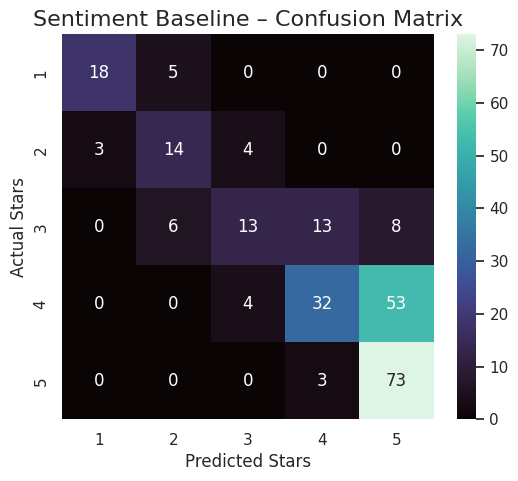

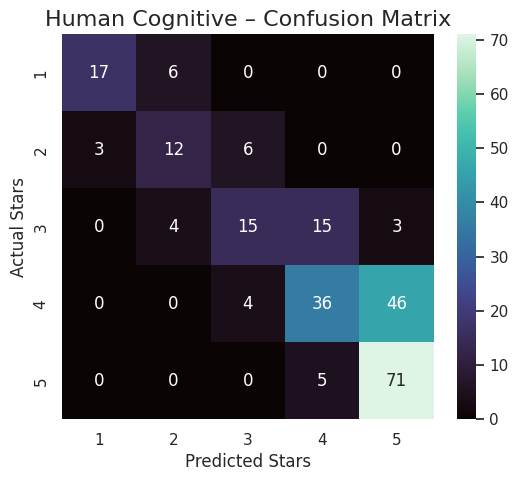

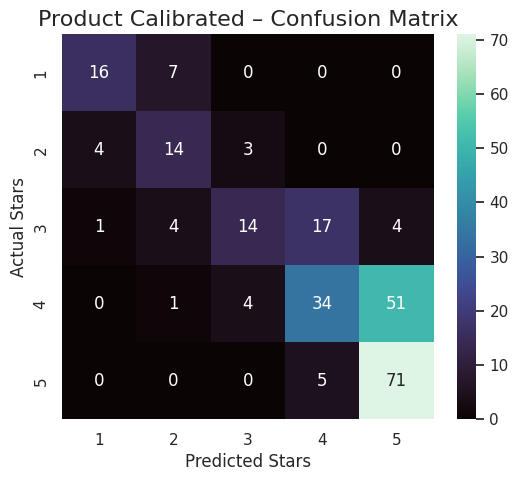

In [69]:
plot_confusion(results_sentiment, "Sentiment Baseline – Confusion Matrix")
plot_confusion(results_human, "Human Cognitive – Confusion Matrix")
plot_confusion(results_product, "Product Calibrated – Confusion Matrix")

In [70]:
def avg_pred_by_actual(df, label):
    avg = (
        df.groupby("actual_stars")["predicted_stars"]
        .mean()
        .reset_index()
    )
    avg["persona"] = label
    return avg

avg_df = pd.concat([
    avg_pred_by_actual(results_sentiment, "Sentiment"),
    avg_pred_by_actual(results_human, "Human"),
    avg_pred_by_actual(results_product, "Product")
])
fig = px.line(
    avg_df,
    x="actual_stars",
    y="predicted_stars",
    color="persona",
    markers=True
)

fig.add_trace(
    go.Scatter(
        x=[1,2,3,4,5],
        y=[1,2,3,4,5],
        mode="lines",
        name="Perfect Prediction",
        line=dict(dash="dash", color="gray")
    )
)

fig.update_layout(
    title="Average Predicted Rating vs Actual Rating",
    xaxis_title="Actual Stars",
    yaxis_title="Average Predicted Stars",
    title_x=0.5
)

fig.show()


The graph indicates a consistent upward bias across all personas for reviews with lower actual star ratings (1-3 stars), often over-predicting them by 0.2 to 0.5 stars. For 4 and 5-star reviews, predictions are largely accurate, with only minor deviations. This suggests a tendency for models to be 'generous' on negative/neutral reviews, consolidating them upwards.

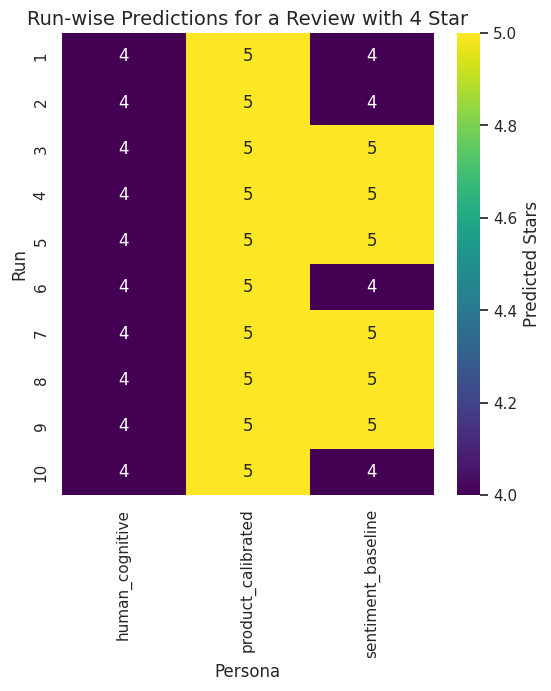

In [78]:
example_review_id = "NsS1BXKprxXiiRcfe0tBmw"  # change if needed

heatmap_df = (
    run_level_df[run_level_df["review_id"] == example_review_id]
    .pivot_table(
        index="run",
        columns="persona",
        values="predicted_stars"
    )
)
plt.figure(figsize=(6,6))

sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="viridis",
    cbar_kws={"label": "Predicted Stars"}
)

plt.title("Run-wise Predictions for a Review with 4 Star", fontsize=14)
plt.xlabel("Persona")
plt.ylabel("Run")
plt.show()


#Actual for this was 4